In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.feature_selection import RFE
import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
# Load the dataset
data = pd.read_csv('c:/Users/USER/Documents/Data Science Journy/StackingOptimization/driving_data.csv')

times_column = 'Time(s)'
pathoder_column = 'PathOrder'
data = data.drop(columns=[times_column, pathoder_column])

# Assume target variable is in between, adjust accordingly
target_column = 'Class'  # Replace with the actual target column name

X = data.drop(columns=[target_column])  # Features
y = data[target_column]   # Target (Driver ID)

# Encode categorical features in X
for column in X.select_dtypes(include=['object']).columns:
	X[column] = LabelEncoder().fit_transform(X[column])

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check for feature correlation with target
correlation_matrix = data.apply(lambda x: pd.factorize(x)[0]).corr()
#print(correlation_matrix[target_column].sort_values(ascending=False))

# Remove highly correlated features (Threshold: 0.9)
high_correlation_features = correlation_matrix[target_column][correlation_matrix[target_column].abs() > 0.9].index.tolist()
high_correlation_features.remove(target_column)  # Remove target from the list
X = X.drop(columns=high_correlation_features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection using Recursive Feature Elimination (RFE) within Cross-Validation
base_model_for_rfe = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
n_features_to_select = 20  # Adjust based on dataset
rfe = RFE(estimator=base_model_for_rfe, n_features_to_select=n_features_to_select)

#pipeline = Pipeline(steps=[('feature_selection', rfe), ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))])

# Perform cross-validation to check for overfitting
#cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
#print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Fit RFE on the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the selected feature indices
selected_features = rfe.support_
#print("Selected Features:", selected_features)

# Print the names of the selected features (if feature names are available)
feature_names = X.columns  # Use correct feature names
selected_feature_names = feature_names[selected_features]
print("Selected Feature Names:", selected_feature_names.tolist())

In [ ]:
print("Selected Feature Names:", selected_feature_names.tolist())

Accuracy RandomForestClassifier: 90.69%
Precision: 0.9106
Recall: 0.9069
F1 Score: 0.9062
Training Accuracy: 0.9112
Test Accuracy: 0.9069


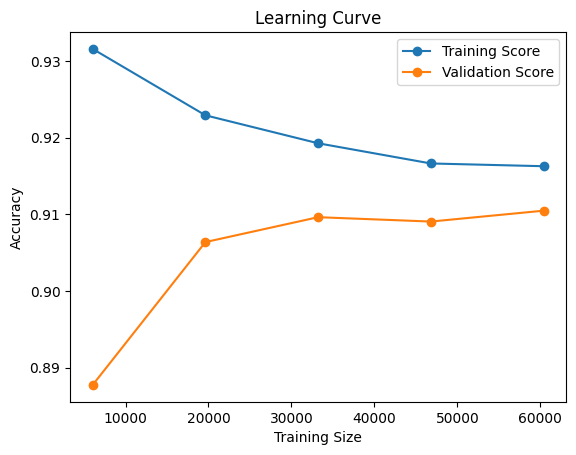

Accuracy LR: 57.39%
Precision: 0.5745
Recall: 0.5739
F1 Score: 0.5669
Training Accuracy: 0.5762
Test Accuracy: 0.5739


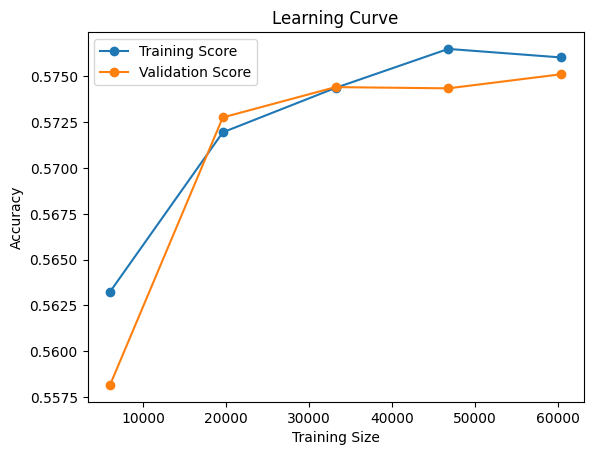

Accuracy KNN: 85.73%
Precision: 0.8570
Recall: 0.8573
F1 Score: 0.8569
Training Accuracy: 0.9148
Test Accuracy: 0.8573


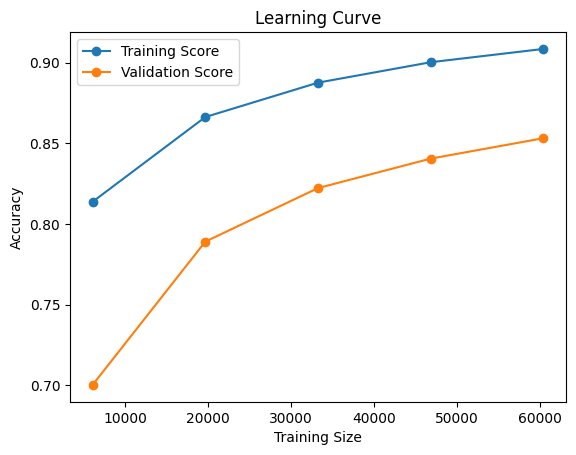

Accuracy NB: 31.99%
Precision: 0.4048
Recall: 0.3199
F1 Score: 0.3015
Training Accuracy: 0.3196
Test Accuracy: 0.3199


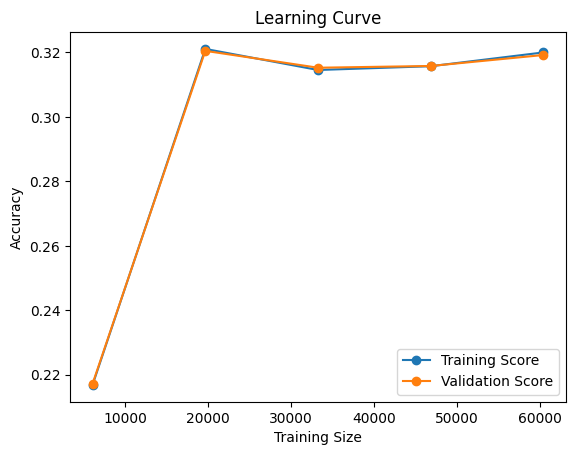

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Accuracy Stacking: 95.83%
Precision: 0.9582
Recall: 0.9583
F1 Score: 0.9582
Training Accuracy: 0.9755
Test Accuracy: 0.9583


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

KeyboardInterrupt: 

In [16]:
# Define Random Forest classifier with reduced complexity
random_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train the Random Forest classifier on the selected features
random_classifier.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = random_classifier.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy RandomForestClassifier: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Check training vs. test accuracy
train_accuracy = accuracy_score(y_train, random_classifier.predict(X_train_rfe))
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy')
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

plot_learning_curve(random_classifier, X_train_rfe, y_train)

# Save the model
joblib.dump(random_classifier, 'driver_identification_model_rfe_rf.pkl')



# Define Logistic Regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression classifier on the selected features
logistic_classifier.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = logistic_classifier.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy LR: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Check training vs. test accuracy
train_accuracy = accuracy_score(y_train, logistic_classifier.predict(X_train_rfe))
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy')
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

plot_learning_curve(logistic_classifier, X_train_rfe, y_train)

# Save the model
joblib.dump(logistic_classifier, 'driver_identification_model_rfe_lr.pkl')



# Define KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the selected features
knn_classifier.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy KNN: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Check training vs. test accuracy
train_accuracy = accuracy_score(y_train, knn_classifier.predict(X_train_rfe))
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy')
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

plot_learning_curve(knn_classifier, X_train_rfe, y_train)

# Save the model
joblib.dump(knn_classifier, 'driver_identification_model_rfe_knn.pkl')




# Define Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier on the selected features
nb_classifier.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy NB: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Check training vs. test accuracy
train_accuracy = accuracy_score(y_train, nb_classifier.predict(X_train_rfe))
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy')
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

plot_learning_curve(nb_classifier, X_train_rfe, y_train)

# Save the model
joblib.dump(nb_classifier, 'driver_identification_model_rfe_nb.pkl')




# Define base models for stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('nb', GaussianNB())
]

# Define meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking ensemble classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_classifier, cv=5)

# Train the stacking classifier on the selected features
stacking_classifier.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy Stacking: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Check training vs. test accuracy
train_accuracy = accuracy_score(y_train, stacking_classifier.predict(X_train_rfe))
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy')
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

plot_learning_curve(stacking_classifier, X_train_rfe, y_train)

# Save the model
joblib.dump(stacking_classifier, 'driver_identification_model_rfe_stacking.pkl')



In [17]:
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Define Available Models
available_models = [
    ("rf", RandomForestClassifier(random_state=42)),
    ("xgb", XGBClassifier(random_state=42)),
    ("lr", LogisticRegression()),
    ("svm", SVC(probability=True, random_state=42)),
    ("knn", KNeighborsClassifier()),
    ("nb", GaussianNB())

#    ("rf", RandomForestClassifier(random_state=42)),
#    ("lr", LogisticRegression()),
#    ("svc", SVC(probability=True, random_state=42)),
#    ("knn", KNeighborsClassifier())
]

# Define Meta Learner
meta_learner = LogisticRegression()



def fitness_function(params):
    """
    Example fitness function for CSA. This evaluates the fitness of a single crow's position.
    """
    selected_models = [

        ("rf", RandomForestClassifier(random_state=42)) if params[0] > 0.5 else None,
        ("xgb", XGBClassifier(random_state=42)) if params[1] > 0.5 else None,
        ("lr", LogisticRegression()) if params[2] > 0.5 else None,
        ("svm", SVC(random_state=42)) if params[3] > 0.5 else None,
        ("knn", KNeighborsClassifier()) if params[4] > 0.5 else None,
        ("nb", GaussianNB()) if params[5] > 0.5 else None

        #("rf", RandomForestClassifier(random_state=42)) if params[0] > 0.5 else None,
        #("lr", LogisticRegression(random_state=42)) if params[1] > 0.5 else None,
        #("svc", SVC()) if params[2] > 0.5 else None,
        #("knn", KNeighborsClassifier()) if params[3] > 0.5 else None
    ]
    selected_models = [model for model in selected_models if model is not None]

    if not selected_models:  # Penalize if no models are selected
        return float('inf')

    # Create stacking model
    stacking_model = StackingClassifier(estimators=selected_models, final_estimator=LogisticRegression(), cv=5)

    # Evaluate with cross-validation
    from sklearn.model_selection import cross_val_score
    try:
        X_train_cv, X_val, y_train_cv, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        stacking_model.fit(X_train_cv, y_train_cv)
        score = stacking_model.score(X_val, y_val)  # Use validation accuracy
        return -score  # Minimize negative accuracy

        #scores = cross_val_score(stacking_model, X_train, y_train, cv=3, scoring='accuracy')
        #return -scores.mean()  # Minimize negative accuracy
    except Exception as e:
        print(f"Error during evaluation: {e}")
        return float('inf')


from joblib import Parallel, delayed

class ParallelCrowSearchAlgorithm:
    def __init__(self, n_crows, n_variables, lower_bound, upper_bound, max_iter, fitness_function):
        self.n_crows = n_crows
        self.n_variables = n_variables
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.max_iter = max_iter
        self.fitness_function = fitness_function

        # Initialize positions and memory
        self.positions = np.random.uniform(low=lower_bound, high=upper_bound, size=(n_crows, n_variables))
        self.memory = np.copy(self.positions)
        self.memory_fitness = np.full(n_crows, np.inf)

    def optimize(self):
        for iteration in range(self.max_iter):
            print(f"Iteration {iteration + 1}/{self.max_iter}")

            # Evaluate fitness for all crows in parallel
            fitness_values = Parallel(n_jobs=-1)(delayed(self.fitness_function)(params) for params in self.positions)

            # Update memory if fitness improves
            for i, fitness in enumerate(fitness_values):
                if fitness < self.memory_fitness[i]:
                    self.memory[i] = self.positions[i]
                    self.memory_fitness[i] = fitness

            # Update positions
            for i in range(self.n_crows):
                random_crow = np.random.randint(0, self.n_crows)
                r = np.random.uniform(0, 1)
                new_position = self.positions[i] + r * (self.memory[random_crow] - self.positions[i])

                # Clip to bounds
                new_position = np.clip(new_position, self.lower_bound, self.upper_bound)
                self.positions[i] = new_position

        # Return the best solution
        best_index = np.argmin(self.memory_fitness)
        return self.memory[best_index], self.memory_fitness[best_index]


# Initialize Parallel CSA
csa = ParallelCrowSearchAlgorithm(
    n_crows=5,               # Number of crows
    n_variables=6,            # 4 binary variables for model selection
    lower_bound=[0, 0, 0, 0, 0, 0], # Lower bounds
    upper_bound=[1, 1, 1, 1, 1, 1], # Upper bounds
    max_iter=5,              # Maximum iterations
    fitness_function=fitness_function
)

# Optimize
best_params, best_fitness = csa.optimize()
print("Best Parameters (Model Selection):", best_params)
print("Best Fitness (Accuracy):", -best_fitness)


selected_models = [

        ("rf", RandomForestClassifier(random_state=42)) if best_params[0] > 0.5 else None,
        ("xgb", XGBClassifier(random_state=42)) if best_params[1] > 0.5 else None,
        ("lr", LogisticRegression()) if best_params[2] > 0.5 else None,
        ("svm", SVC(random_state=42)) if best_params[3] > 0.5 else None,
        ("knn", KNeighborsClassifier()) if best_params[4] > 0.5 else None,
        ("nb", GaussianNB()) if best_params[5] > 0.5 else None

    #("RandomForest" if best_params[0] > 0.5 else None),
    #("LogisticRegression" if best_params[1] > 0.5 else None),
    #("SVC" if best_params[2] > 0.5 else None),
    #("KNeighborsClassifier" if best_params[3] > 0.5 else None)
]

selected_models = [model for model in selected_models if model is not None]
print("Selected Models:", selected_models)


# Train Final Model with Selected Models

optimized_model = StackingClassifier(
    estimators=selected_models,
    final_estimator=meta_learner,
    cv=5
)
optimized_model.fit(X_train, y_train)

# Test Final Model
y_pred = optimized_model.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Selected Models:", selected_models)
print("\nOptimized Stacking Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
Best Parameters (Model Selection): [0.72688778 0.062418   0.45757838 0.24669971 0.90913054 0.901805  ]
Best Fitness (Accuracy): 0.983643467320045
Selected Models: [('rf', RandomForestClassifier(random_state=42)), ('knn', KNeighborsClassifier()), ('nb', GaussianNB())]
Selected Models: [('rf', RandomForestClassifier(random_state=42)), ('knn', KNeighborsClassifier()), ('nb', GaussianNB())]

Optimized Stacking Model Performance:
Accuracy: 0.9843
Precision: 0.9843
Recall: 0.9843
F1 Score: 0.9843


SVC

In [18]:
 # Define Support Vector classifier
svc_classifier = SVC() 

# Train the Support Vector classifier on the selected features
svc_classifier.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = svc_classifier.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy SVC: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Check training vs. test accuracy
train_accuracy = accuracy_score(y_train, svc_classifier.predict(X_train_rfe))
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy')
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

plot_learning_curve(svc_classifier, X_train_rfe, y_train)


Accuracy SVC: 82.59%
Precision: 0.8319
Recall: 0.8259
F1 Score: 0.8261


KeyboardInterrupt: 

XGBoost

In [21]:
# Define XGBClassifier
xgb_classifier = XGBClassifier() 

# Train the XGBClassifier on the selected features
xgb_classifier.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy XGBoost: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Check training vs. test accuracy
# train_accuracy = accuracy_score(y_train, xgb_classifier.predict(X_train_rfe))
# test_accuracy = accuracy_score(y_test, y_pred)
# print(f'Training Accuracy: {train_accuracy:.4f}')
# print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy')
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

#plot_learning_curve(xgb_classifier, X_train_rfe, y_train)


Accuracy XGBoost: 99.28%
Precision: 0.9929
Recall: 0.9928
F1 Score: 0.9928


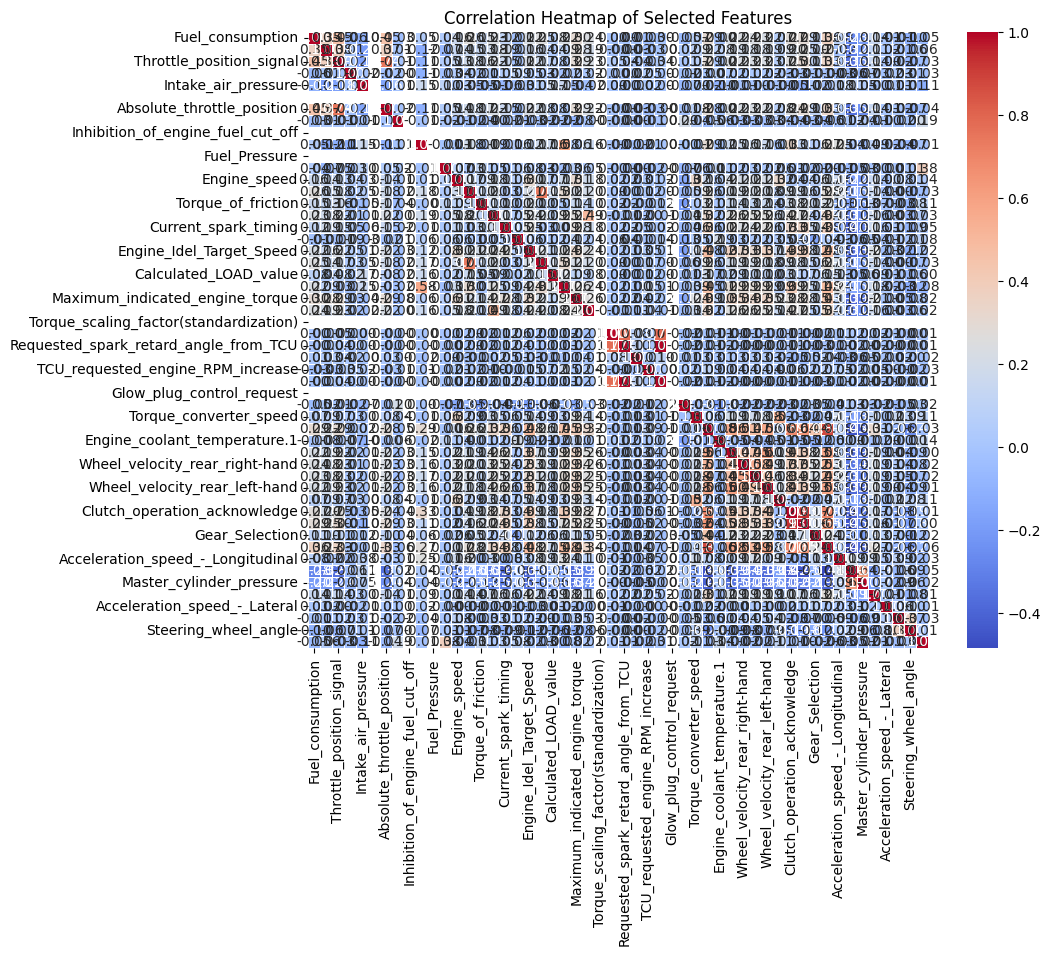

Selected Feature Names: ['Fuel_consumption', 'Accelerator_Pedal_value', 'Throttle_position_signal', 'Intake_air_pressure', 'Absolute_throttle_position', 'Engine_soacking_time', 'Long_Term_Fuel_Trim_Bank1', 'Engine_speed', 'Engine_torque_after_correction', 'Torque_of_friction', 'Engine_coolant_temperature', 'Engine_torque', 'Calculated_LOAD_value', 'Maximum_indicated_engine_torque', 'Activation_of_Air_compressor', 'Engine_coolant_temperature.1', 'Wheel_velocity_front_left-hand', 'Wheel_velocity_rear_right-hand', 'Wheel_velocity_rear_left-hand', 'Master_cylinder_pressure']


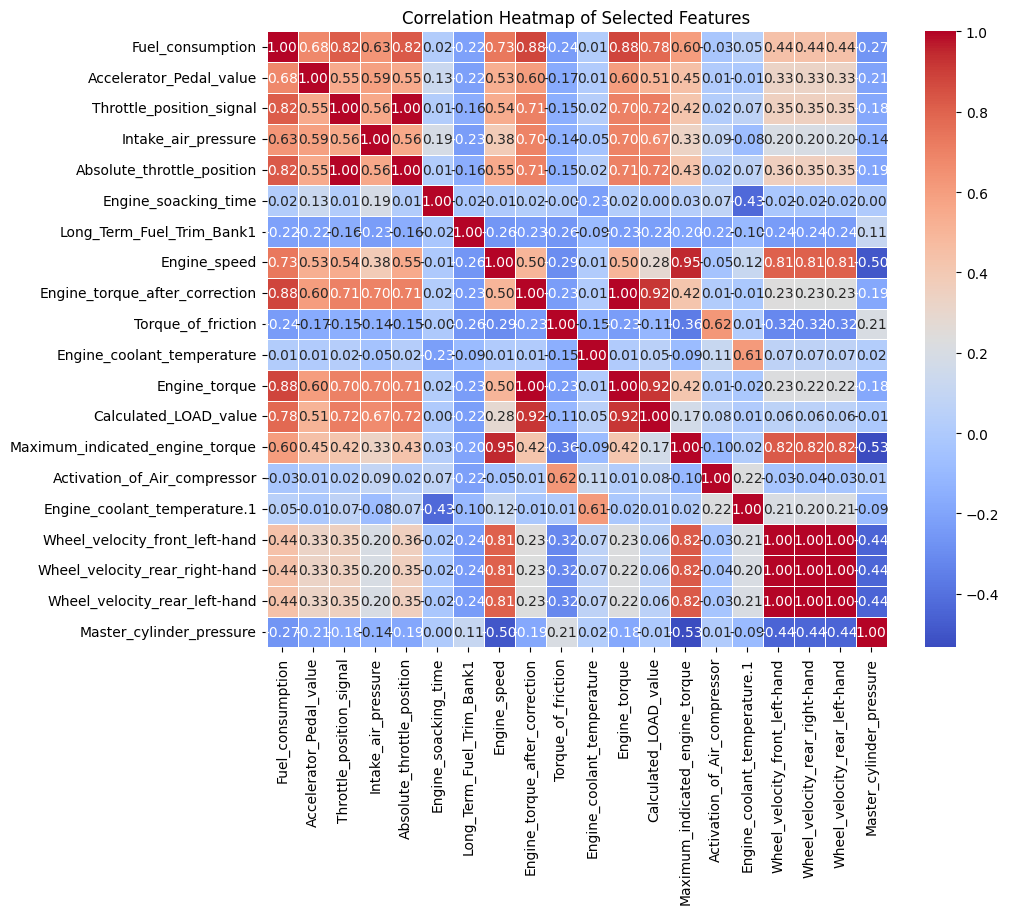

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('c:/Users/USER/Documents/Data Science Journy/StackingOptimization/driving_data.csv')

times_column = 'Time(s)'
pathoder_column = 'PathOrder'
data = data.drop(columns=[times_column, pathoder_column])

# Assume target variable is in between, adjust accordingly
target_column = 'Class'  # Replace with the actual target column name

X = data.drop(columns=[target_column])  # Features
y = data[target_column]   # Target (Driver ID)

# Encode categorical features in X
for column in X.select_dtypes(include=['object']).columns:
	X[column] = LabelEncoder().fit_transform(X[column])

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check for feature correlation with target
correlation_matrix = data.apply(lambda x: pd.factorize(x)[0]).corr()
#print(correlation_matrix[target_column].sort_values(ascending=False))


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()



# Remove highly correlated features (Threshold: 0.9)
high_correlation_features = correlation_matrix[target_column][correlation_matrix[target_column].abs() > 0.9].index.tolist()
high_correlation_features.remove(target_column)  # Remove target from the list
X = X.drop(columns=high_correlation_features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection using Recursive Feature Elimination (RFE) within Cross-Validation
base_model_for_rfe = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
n_features_to_select = 20  # Adjust based on dataset
rfe = RFE(estimator=base_model_for_rfe, n_features_to_select=n_features_to_select)

#pipeline = Pipeline(steps=[('feature_selection', rfe), ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))])

# Perform cross-validation to check for overfitting
#cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
#print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Fit RFE on the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the selected feature indices
selected_features = rfe.support_
#print("Selected Features:", selected_features)

# Print the names of the selected features (if feature names are available)
feature_names = X.columns  # Use correct feature names
selected_feature_names = feature_names[selected_features]
print("Selected Feature Names:", selected_feature_names.tolist())

# Create a DataFrame with selected features
selected_features_df = pd.DataFrame(X_train_rfe, columns=selected_feature_names)

# Compute the correlation matrix
corr_matrix = selected_features_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()


Selected Feature Names: ['Accelerator_Pedal_value', 'Throttle_position_signal', 'Intake_air_pressure', 'Absolute_throttle_position', 'Engine_soacking_time', 'Long_Term_Fuel_Trim_Bank1', 'Engine_speed', 'Engine_torque_after_correction', 'Torque_of_friction', 'Maximum_indicated_engine_torque', 'Activation_of_Air_compressor', 'Engine_coolant_temperature.1', 'Wheel_velocity_front_left-hand', 'Wheel_velocity_rear_left-hand', 'Master_cylinder_pressure']


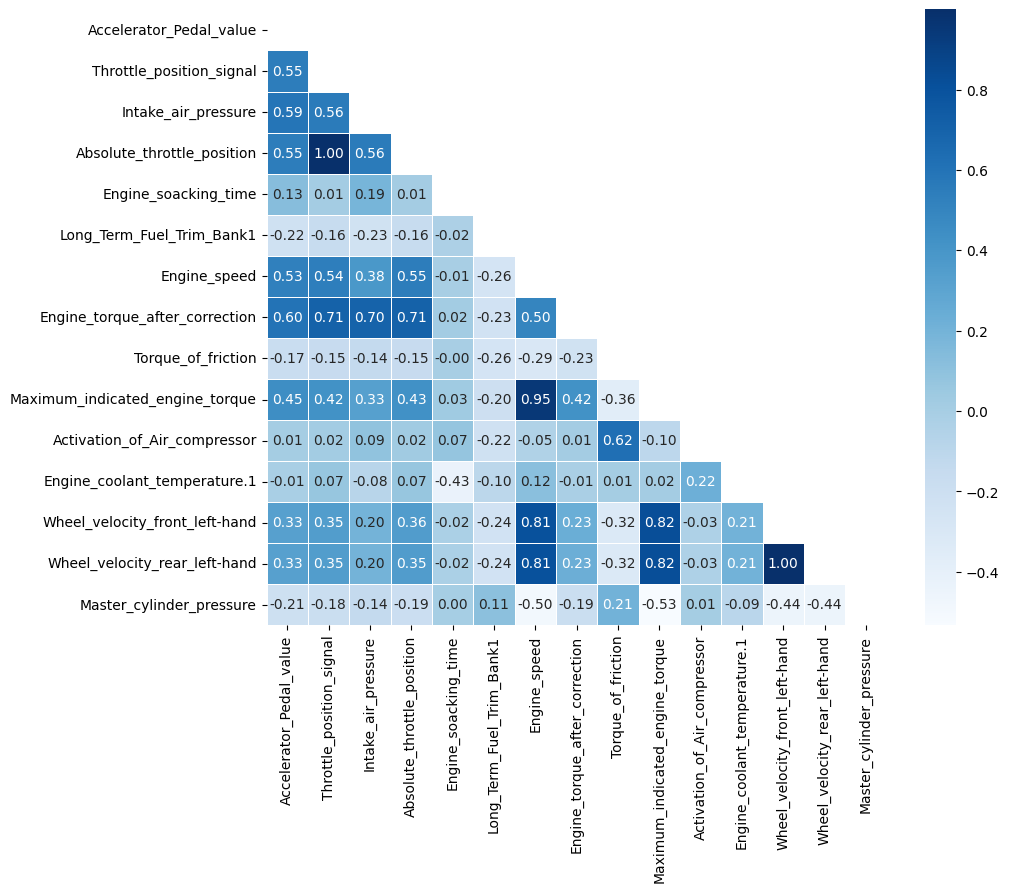

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('c:/Users/USER/Documents/Data Science Journy/StackingOptimization/driving_data.csv')

times_column = 'Time(s)'
pathoder_column = 'PathOrder'
data = data.drop(columns=[times_column, pathoder_column])

# Assume target variable is in between, adjust accordingly
target_column = 'Class'  # Replace with the actual target column name

X = data.drop(columns=[target_column])  # Features
y = data[target_column]   # Target (Driver ID)

# Encode categorical features in X
for column in X.select_dtypes(include=['object']).columns:
	X[column] = LabelEncoder().fit_transform(X[column])

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check for feature correlation with target
correlation_matrix = data.apply(lambda x: pd.factorize(x)[0]).corr()
#print(correlation_matrix[target_column].sort_values(ascending=False))

# Remove highly correlated features (Threshold: 0.9)
high_correlation_features = correlation_matrix[target_column][correlation_matrix[target_column].abs() > 0.9].index.tolist()
high_correlation_features.remove(target_column)  # Remove target from the list
X = X.drop(columns=high_correlation_features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection using Recursive Feature Elimination (RFE) within Cross-Validation
base_model_for_rfe = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
n_features_to_select = 15  # Adjust based on dataset
rfe = RFE(estimator=base_model_for_rfe, n_features_to_select=n_features_to_select)

#pipeline = Pipeline(steps=[('feature_selection', rfe), ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))])

# Perform cross-validation to check for overfitting
#cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
#print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Fit RFE on the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the selected feature indices
selected_features = rfe.support_
#print("Selected Features:", selected_features)

# Print the names of the selected features (if feature names are available)
feature_names = X.columns  # Use correct feature names
selected_feature_names = feature_names[selected_features]
print("Selected Feature Names:", selected_feature_names.tolist())

# Create a DataFrame with selected features
selected_features_df = pd.DataFrame(X_train_rfe, columns=selected_feature_names)

# Compute the correlation matrix
corr_matrix = selected_features_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
#plt.title("Lower Triangle Correlation Heatmap of Selected Features")
plt.show()


# Plot the heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title("Correlation Heatmap of Selected Features")
#plt.show()


Selected Feature Names: ['Fuel_consumption', 'Accelerator_Pedal_value', 'Throttle_position_signal', 'Intake_air_pressure', 'Absolute_throttle_position', 'Engine_soacking_time', 'Long_Term_Fuel_Trim_Bank1', 'Engine_speed', 'Engine_torque_after_correction', 'Torque_of_friction', 'Engine_coolant_temperature', 'Engine_torque', 'Calculated_LOAD_value', 'Maximum_indicated_engine_torque', 'Activation_of_Air_compressor', 'Engine_coolant_temperature.1', 'Wheel_velocity_front_left-hand', 'Wheel_velocity_rear_right-hand', 'Wheel_velocity_rear_left-hand', 'Master_cylinder_pressure']


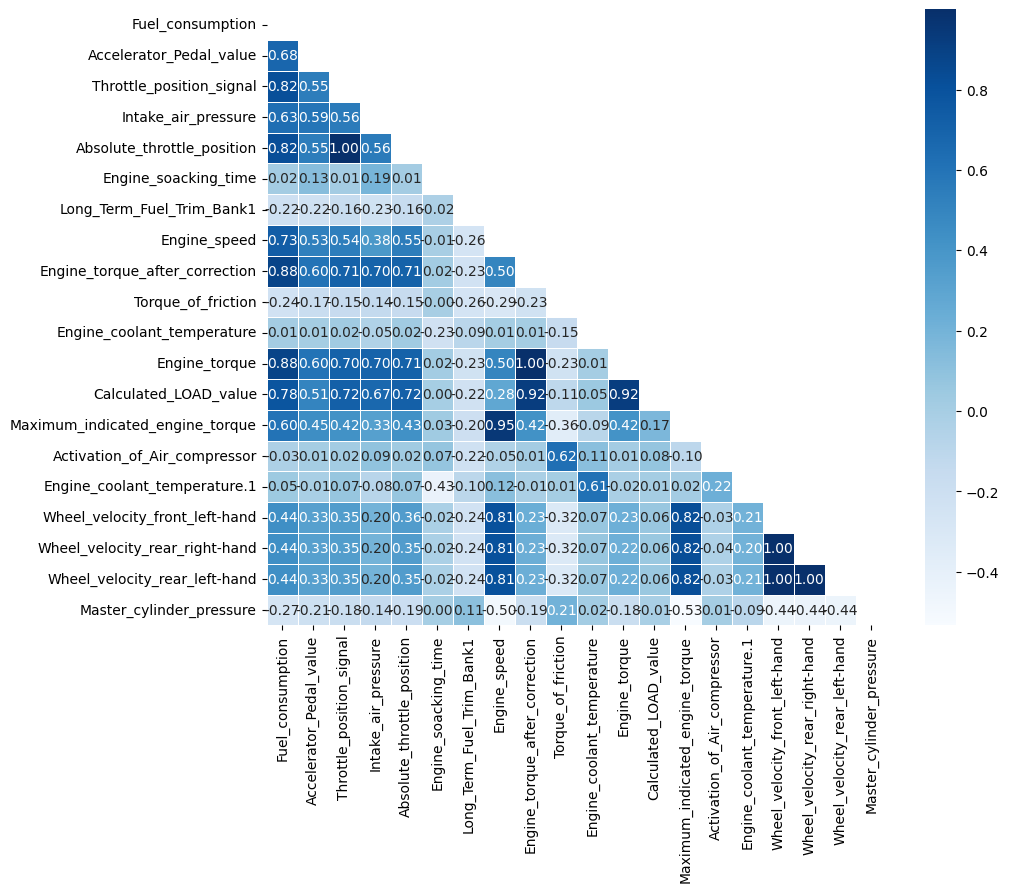

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('c:/Users/USER/Documents/Data Science Journy/StackingOptimization/driving_data.csv')

times_column = 'Time(s)'
pathoder_column = 'PathOrder'
data = data.drop(columns=[times_column, pathoder_column])

# Assume target variable is in between, adjust accordingly
target_column = 'Class'  # Replace with the actual target column name

X = data.drop(columns=[target_column])  # Features
y = data[target_column]   # Target (Driver ID)

# Encode categorical features in X
for column in X.select_dtypes(include=['object']).columns:
	X[column] = LabelEncoder().fit_transform(X[column])

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check for feature correlation with target
correlation_matrix = data.apply(lambda x: pd.factorize(x)[0]).corr()
#print(correlation_matrix[target_column].sort_values(ascending=False))

# Remove highly correlated features (Threshold: 0.9)
high_correlation_features = correlation_matrix[target_column][correlation_matrix[target_column].abs() > 0.9].index.tolist()
high_correlation_features.remove(target_column)  # Remove target from the list
X = X.drop(columns=high_correlation_features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection using Recursive Feature Elimination (RFE) within Cross-Validation
base_model_for_rfe = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
n_features_to_select = 20  # Adjust based on dataset
rfe = RFE(estimator=base_model_for_rfe, n_features_to_select=n_features_to_select)

#pipeline = Pipeline(steps=[('feature_selection', rfe), ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))])

# Perform cross-validation to check for overfitting
#cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
#print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Fit RFE on the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the selected feature indices
selected_features = rfe.support_
#print("Selected Features:", selected_features)

# Print the names of the selected features (if feature names are available)
feature_names = X.columns  # Use correct feature names
selected_feature_names = feature_names[selected_features]
print("Selected Feature Names:", selected_feature_names.tolist())

# Create a DataFrame with selected features
selected_features_df = pd.DataFrame(X_train_rfe, columns=selected_feature_names)

# Compute the correlation matrix
corr_matrix = selected_features_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
#plt.title("Lower Triangle Correlation Heatmap of Selected Features")
plt.show()



Selected Feature Names: ['Fuel_consumption', 'Accelerator_Pedal_value', 'Throttle_position_signal', 'Intake_air_pressure', 'Absolute_throttle_position', 'Engine_soacking_time', 'Long_Term_Fuel_Trim_Bank1', 'Engine_speed', 'Engine_torque_after_correction', 'Torque_of_friction', 'Engine_coolant_temperature', 'Engine_torque', 'Calculated_LOAD_value', 'Maximum_indicated_engine_torque', 'Activation_of_Air_compressor', 'Engine_coolant_temperature.1', 'Wheel_velocity_front_left-hand', 'Wheel_velocity_rear_right-hand', 'Wheel_velocity_rear_left-hand', 'Master_cylinder_pressure']


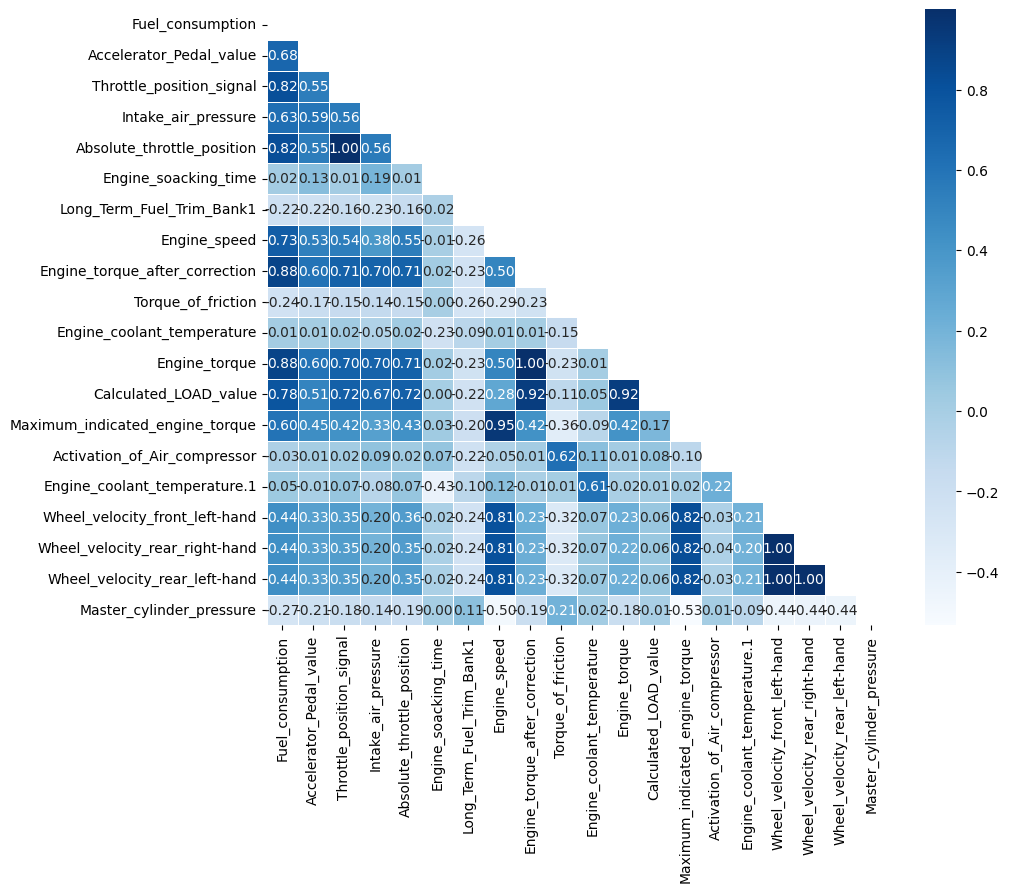

Accuracy XGBoost: 99.28%
Precision: 0.9929
Recall: 0.9928
F1 Score: 0.9928
Training Accuracy: 0.9995
Test Accuracy: 0.9928


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('c:/Users/USER/Documents/Data Science Journy/StackingOptimization/driving_data.csv')

times_column = 'Time(s)'
pathoder_column = 'PathOrder'
data = data.drop(columns=[times_column, pathoder_column])

# Assume target variable is in between, adjust accordingly
target_column = 'Class'  # Replace with the actual target column name

X = data.drop(columns=[target_column])  # Features
y = data[target_column]   # Target (Driver ID)

# Encode categorical features in X
for column in X.select_dtypes(include=['object']).columns:
	X[column] = LabelEncoder().fit_transform(X[column])

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Check for feature correlation with target
correlation_matrix = data.apply(lambda x: pd.factorize(x)[0]).corr()
#print(correlation_matrix[target_column].sort_values(ascending=False))

# Remove highly correlated features (Threshold: 0.9)
high_correlation_features = correlation_matrix[target_column][correlation_matrix[target_column].abs() > 0.9].index.tolist()
high_correlation_features.remove(target_column)  # Remove target from the list
X = X.drop(columns=high_correlation_features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection using Recursive Feature Elimination (RFE) within Cross-Validation
base_model_for_rfe = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
n_features_to_select = 20  # Adjust based on dataset
rfe = RFE(estimator=base_model_for_rfe, n_features_to_select=n_features_to_select)

#pipeline = Pipeline(steps=[('feature_selection', rfe), ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))])

# Perform cross-validation to check for overfitting
#cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
#print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Fit RFE on the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Get the selected feature indices
selected_features = rfe.support_
#print("Selected Features:", selected_features)

# Print the names of the selected features (if feature names are available)
feature_names = X.columns  # Use correct feature names
selected_feature_names = feature_names[selected_features]
print("Selected Feature Names:", selected_feature_names.tolist())

# Create a DataFrame with selected features
selected_features_df = pd.DataFrame(X_train_rfe, columns=selected_feature_names)

# Compute the correlation matrix
corr_matrix = selected_features_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
#plt.title("Lower Triangle Correlation Heatmap of Selected Features")
plt.show()


from xgboost import XGBClassifier

# Define XGBClassifier
xgb_classifier = XGBClassifier() 

# Train the XGBClassifier on the selected features
xgb_classifier.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy XGBoost: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Check training vs. test accuracy
train_accuracy = accuracy_score(y_train, xgb_classifier.predict(X_train_rfe))
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy')
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

plot_learning_curve(xgb_classifier, X_train_rfe, y_train)


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Plot Learning Curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy')
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Validation Score')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

plot_learning_curve(xgb_classifier, X_train_rfe, y_train)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [10]:
pip install scikit-learn==1.3.0 xgboost==1.7.6

     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     -

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 472, in read
    s = self.fp.read(amt)